In [1]:
import matplotlib.pyplot as plt
import matplotlib.collections as mplc
import pysal as ps
from shapely import geometry as sgeom
import descartes as des
import centrography as cent
%matplotlib inline

In [2]:
data = ps.open(ps.examples.get_path('columbus.shp')).read()
chains = [chain.parts[0] for chain in data]

In [3]:
points = chains[0]
points

[(8.624129295349121, 14.236980438232422),
 (8.559700012207031, 14.742449760437012),
 (8.809452056884766, 14.734430313110352),
 (8.808412551879883, 14.636520385742188),
 (8.919304847717285, 14.638500213623047),
 (9.087138175964355, 14.63049030303955),
 (9.09996509552002, 14.244830131530762),
 (9.015047073364258, 14.241840362548828),
 (9.008951187133789, 13.995059967041016),
 (8.818140029907227, 14.002050399780273),
 (8.653305053710938, 14.008090019226074),
 (8.642902374267578, 14.089710235595703),
 (8.63259220123291, 14.1705904006958),
 (8.625825881958008, 14.22367000579834),
 (8.624129295349121, 14.236980438232422)]

Let's plot that polygon by interpreting it in Shapely and using its draw behavior.

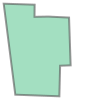

In [4]:
poly = sgeom.Polygon(points)
poly

Nifty. Now, I've implemented Skyum's method for finding the Minimum Bounding Circle for a set of points in `centrography`. 

Right now, there's some extra printing. Essentially, if you have sufficiently straight lines on the boundary, the equations for the circumcenter of the tuple $(p,q,r)$ explodes. Thus, I test if $\angle (p,q,r)$ identifies a circle whose diameter is $(p,r)$ or $(p,q)$. There are two triplets of straight enough lines, so their circle equations are modified, and I retain printing for bug diagnostics.

In [5]:
(radius, center), inset, removed, constraints = cent.skyum(points)
#p,q,r = cent.skyum(points)
#mbc = cent._circle(points[p], points[q], points[r])
#mbc = cent._circle()
mbc_poly = sgeom.Point(*center).buffer(radius)

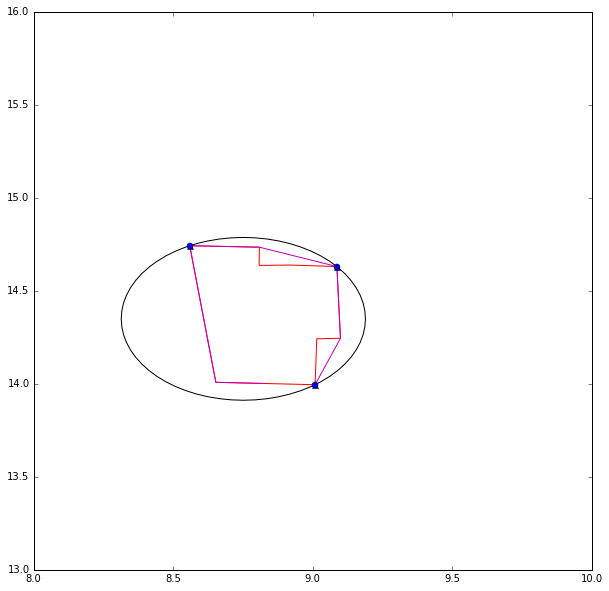

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim(8, 10)
ax.set_ylim(13,16)
ax.plot([p[0] for p in points], [p[-1] for p in points], 'r')
ax.add_patch(des.PolygonPatch(mbc_poly, fc='white', ec='black'))
chull = cent.hull(points)
ax.plot([p[0] for p in chull], [p[-1] for p in chull], 'm')
ax.plot([p[0] for p in constraints], [p[-1] for p in constraints], '^b')
ax.plot([p[0] for p in inset], [p[-1] for p in inset], 'ob')
ax.plot([p[0] for p in removed], [p[-1] for p in removed], 'xb')
plt.show()

### Cool. How fast is this?

In [7]:
import time

In [61]:
def demo_mbc(chains):
    for cidx, chain in enumerate(chains):
        points = chain
        start = time.time()
        (radius, center), inset, removed, constraints = cent.skyum(chain)
        elapsed = time.time() - start
        mbc_poly = sgeom.Point(*center).buffer(radius)
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        parray = ps.common.np.array(points)
        ax.set_xlim(parray[:,0].min()*.98, parray[:,0].max()*1.02)
        ax.set_ylim(parray[:,1].min()*.98, parray[:,1].max()*1.02)
        ax.plot([p[0] for p in points], [p[-1] for p in points], 'r')
        ax.add_patch(des.PolygonPatch(mbc_poly, fc='white', ec='black'))
        chull = cent.hull(points)
        #ax.plot([p[0] for p in chull], [p[-1] for p in chull], '--m')
        ax.plot([p[0] for p in constraints], [p[-1] for p in constraints], '^b')
        #ax.plot([p[0] for p in inset], [p[-1] for p in inset], 'ob')
        ax.plot([p[0][0] for p in removed[:-1]], [p[0][1] for p in removed[:-1]], 'xc')
        ax.plot(removed[-1][0][0], removed[-1][0][1], '*k')
        plt.title('Shape #{}, Elapsed Time: {}'.format(cidx, elapsed))
        #print(removed)
        nonboundary = [p for p in chull.tolist() if p not in constraints]
        succeeded = [mbc_poly.contains(sgeom.Point(p)) for p in nonboundary]
        for i,v in enumerate(succeeded):
            print("Point {i}: {tf}".format(i=i, tf=v))
            if not v:
                ax.plot(chull.tolist()[i][0], chull.tolist()[i][1], 'gH')
        plt.show()
        plt.clf()

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True


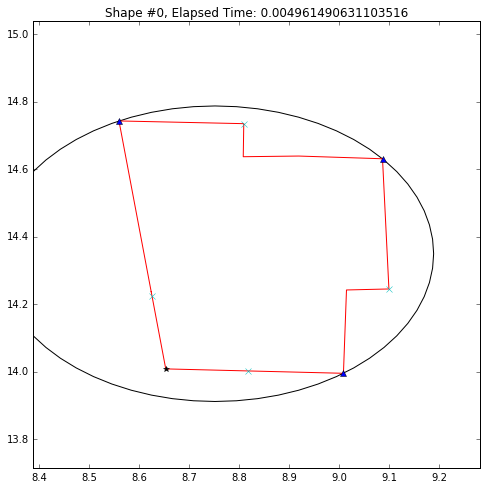

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True


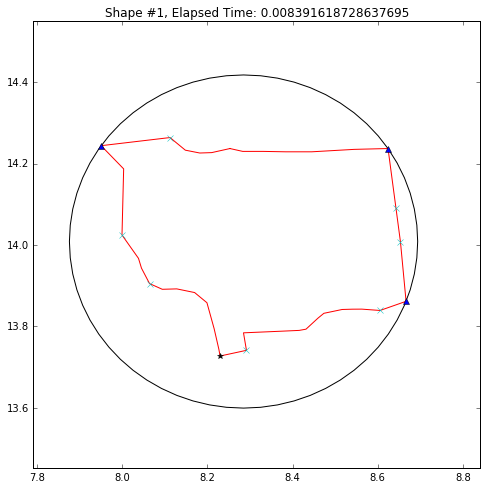

Point 0: False
Point 1: True
Point 2: True
Point 3: True
Point 4: True


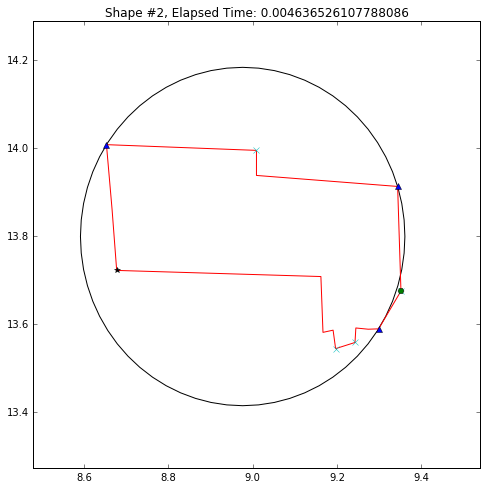

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


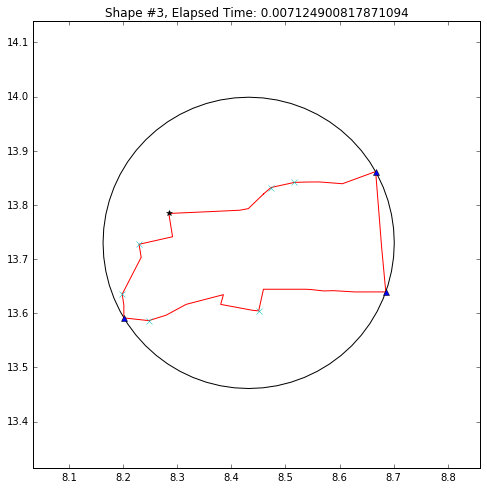

Point 0: False
Point 1: True
Point 2: True
Point 3: True
Point 4: True


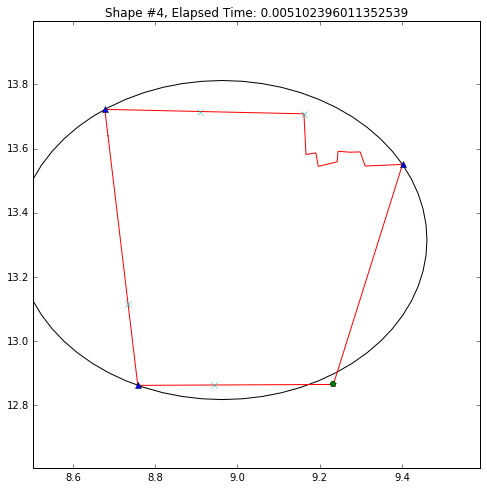

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


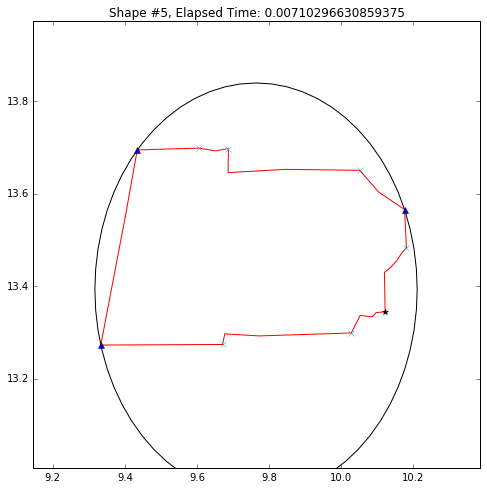

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True


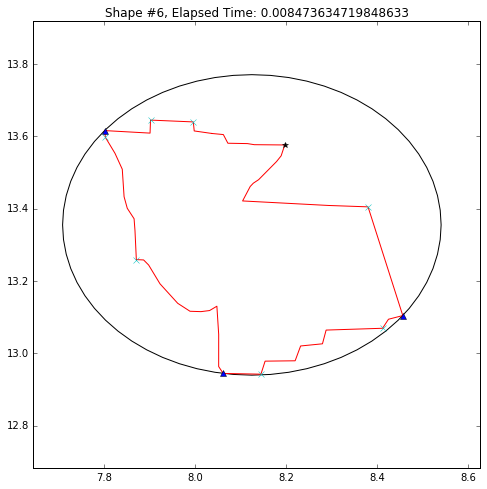

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True


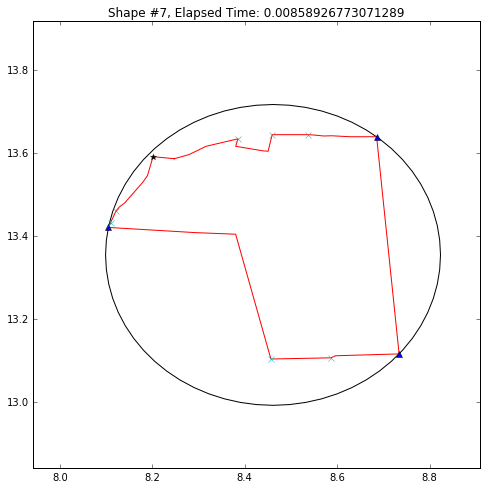

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: False
Point 6: False
Point 7: True
Point 8: True


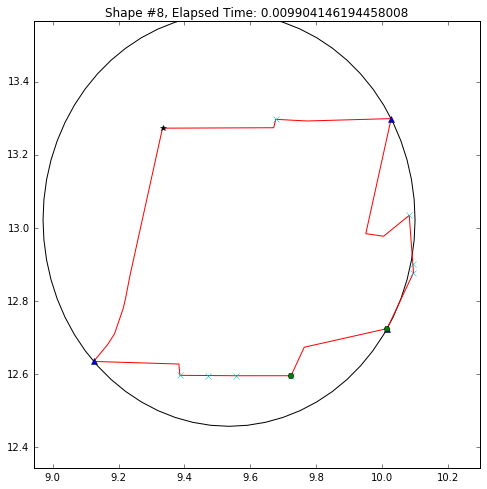

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True


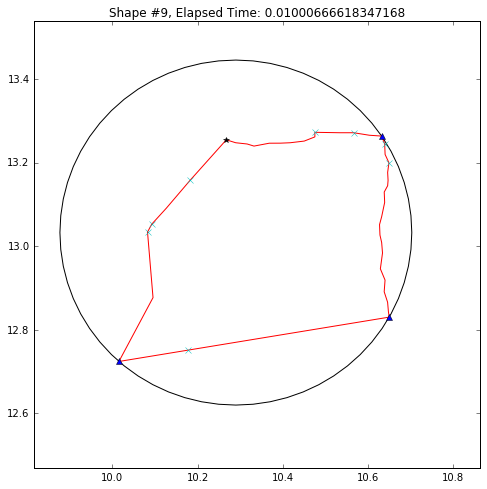

Point 0: True
Point 1: True
Point 2: True
Point 3: True


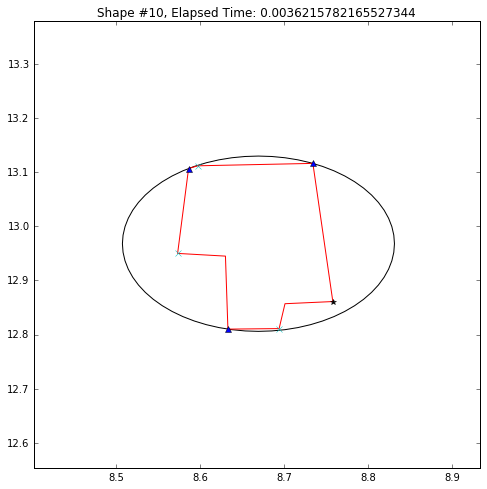

Point 0: True
Point 1: True
Point 2: True
Point 3: True


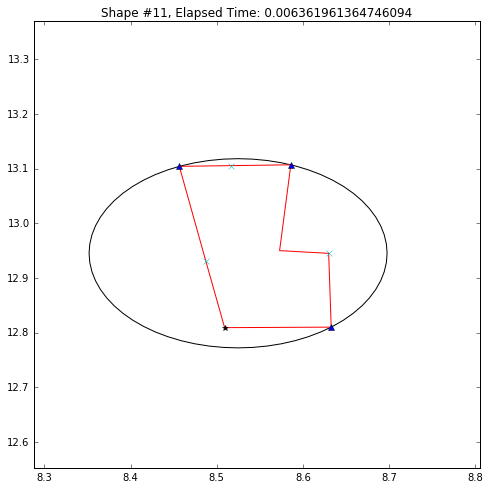

Point 0: True
Point 1: True


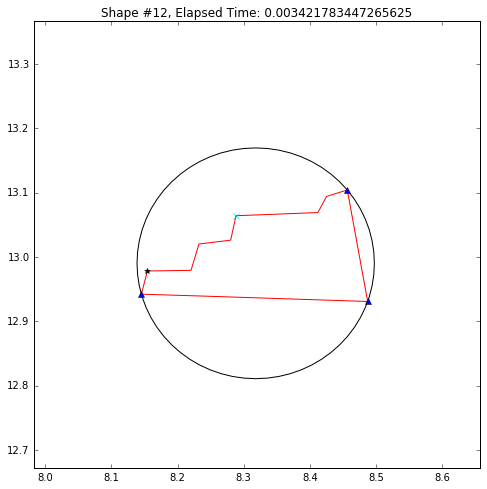

Point 0: True
Point 1: True
Point 2: True
Point 3: True


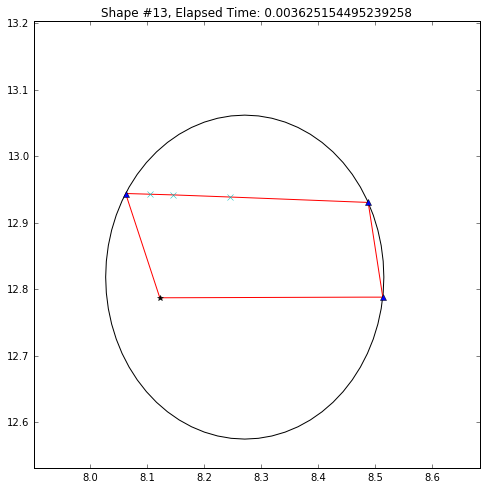

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True


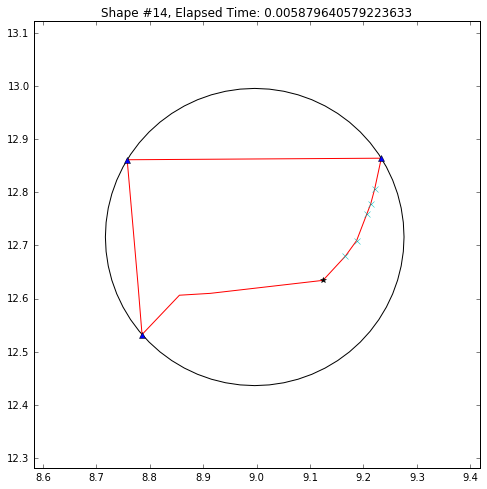

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


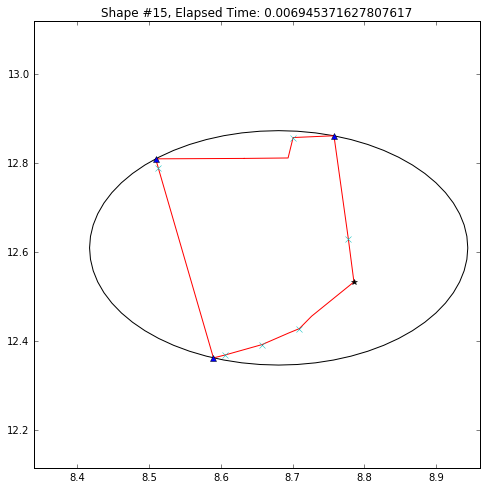

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True


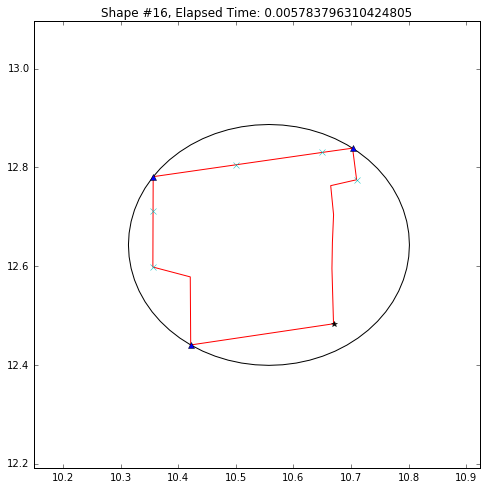

Point 0: False
Point 1: False
Point 2: False
Point 3: False
Point 4: False
Point 5: False
Point 6: True
Point 7: False
Point 8: False


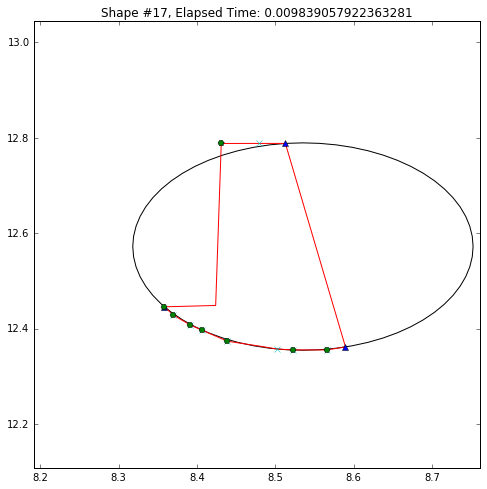

Point 0: True
Point 1: True
Point 2: True


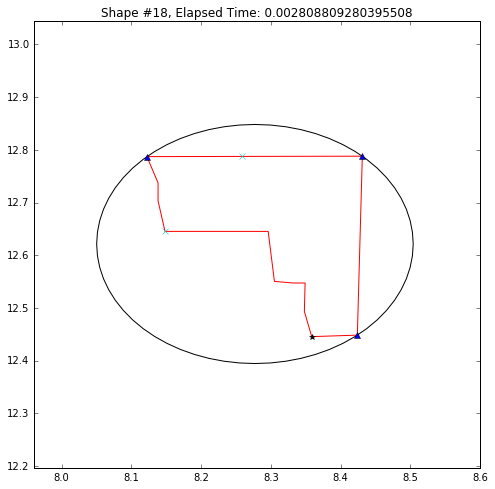

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True


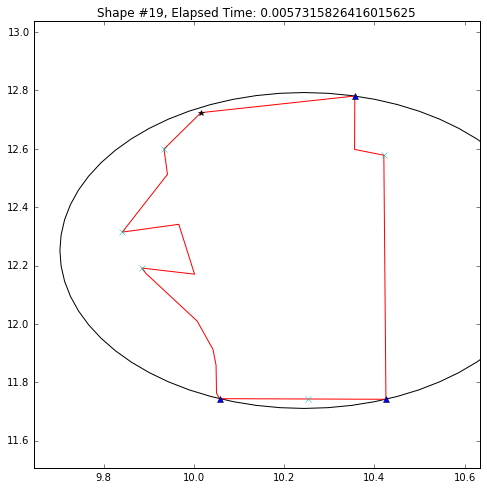

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: False
Point 9: False
Point 10: False
Point 11: True
Point 12: True
Point 13: True
Point 14: True
Point 15: True
Point 16: True


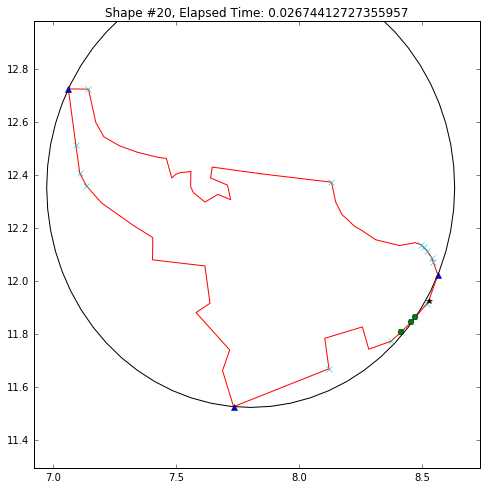

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


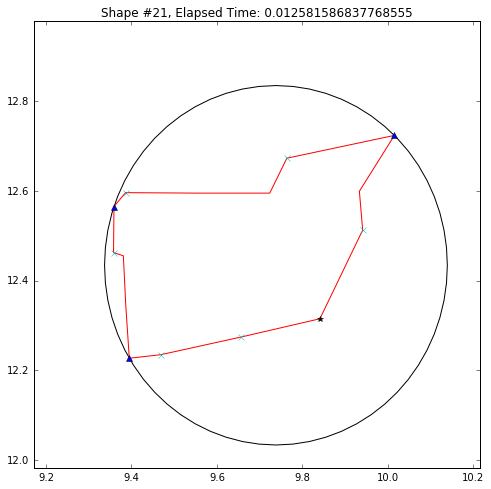

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True


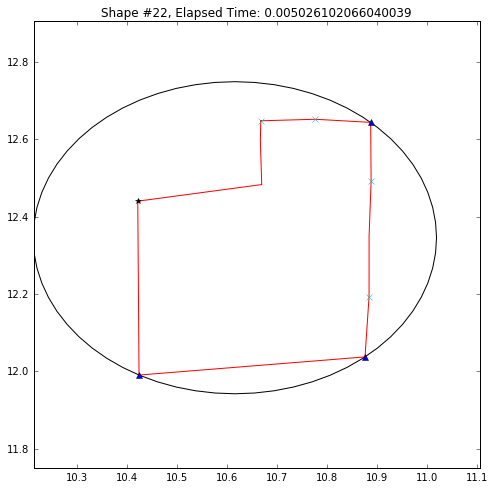

Point 0: True
Point 1: True
Point 2: False
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True
Point 9: True
Point 10: True


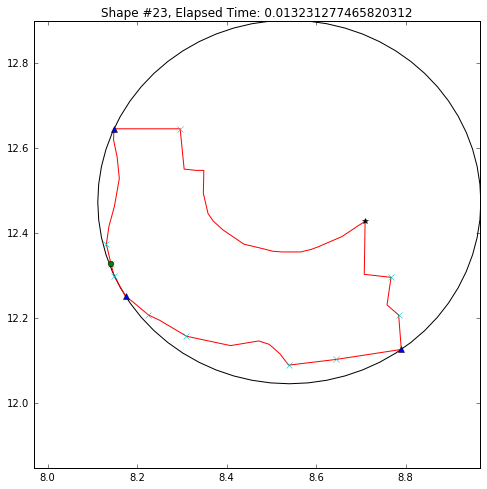

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True


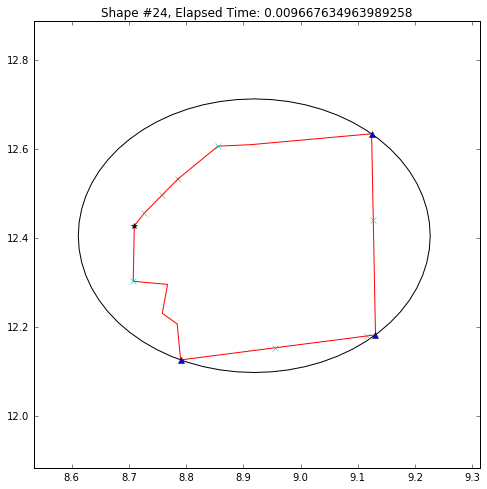

Point 0: True
Point 1: True
Point 2: True
Point 3: True


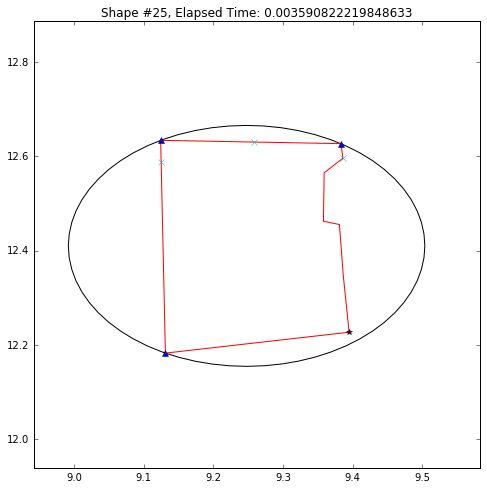

Point 0: True
Point 1: True
Point 2: True
Point 3: True


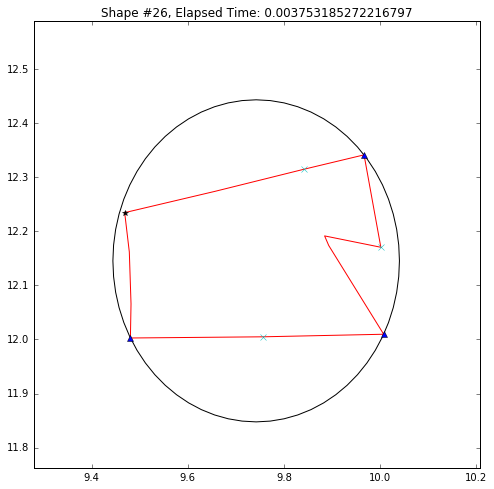

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True
Point 9: True


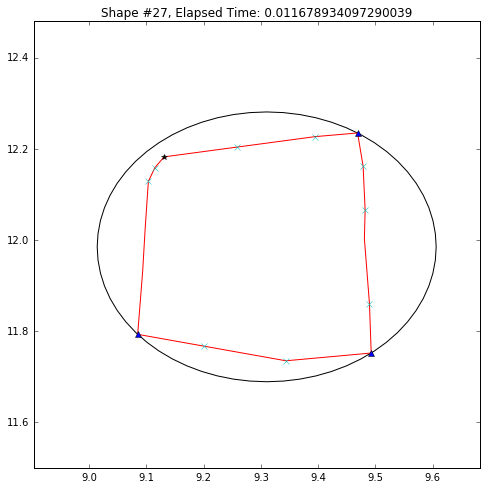

Point 0: True
Point 1: True
Point 2: True


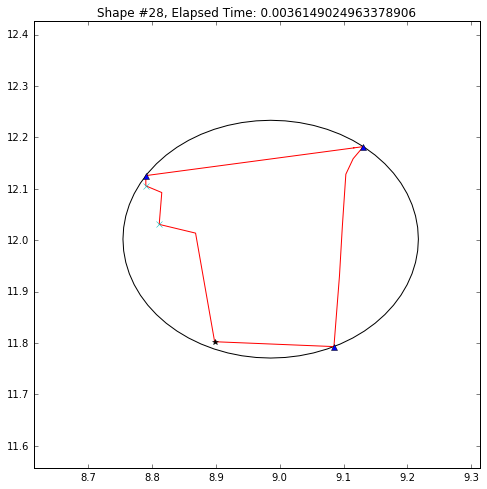

Point 0: True
Point 1: True
Point 2: True


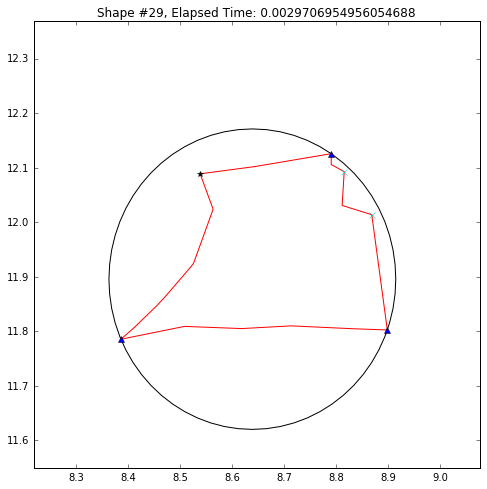

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


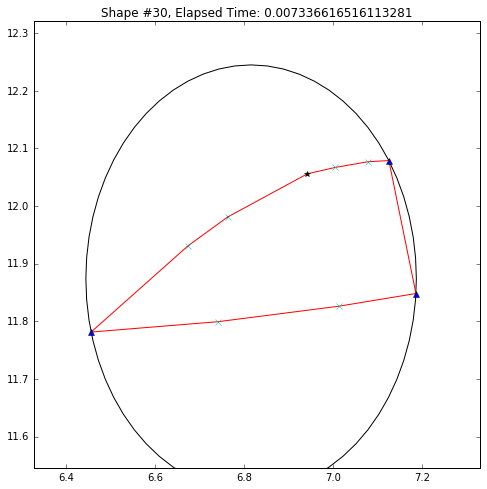

Point 0: True
Point 1: True
Point 2: True
Point 3: True


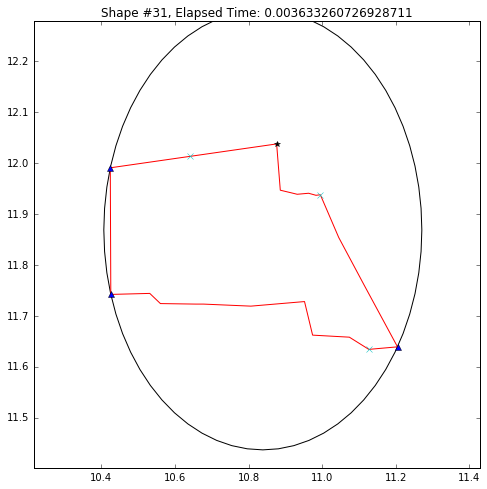

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


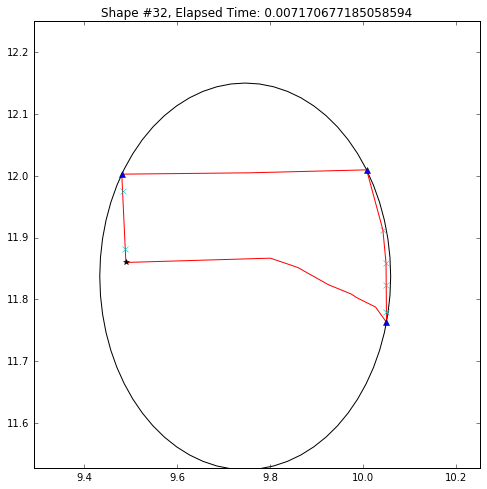

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True


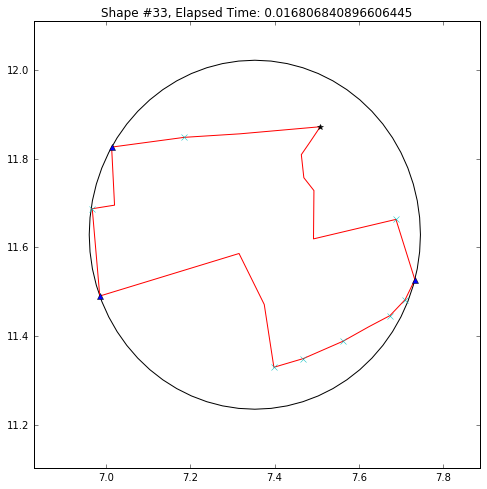

Point 0: True
Point 1: False
Point 2: True
Point 3: False
Point 4: True
Point 5: True
Point 6: True
Point 7: True


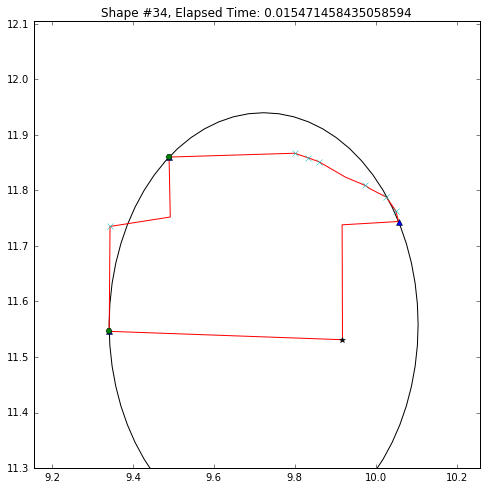

Point 0: True
Point 1: True
Point 2: True
Point 3: True


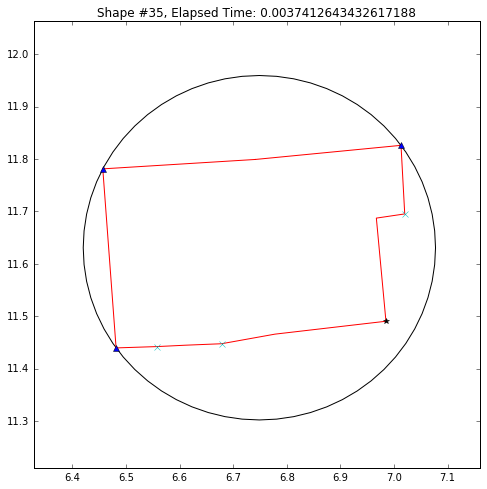

Point 0: True
Point 1: True
Point 2: True
Point 3: True


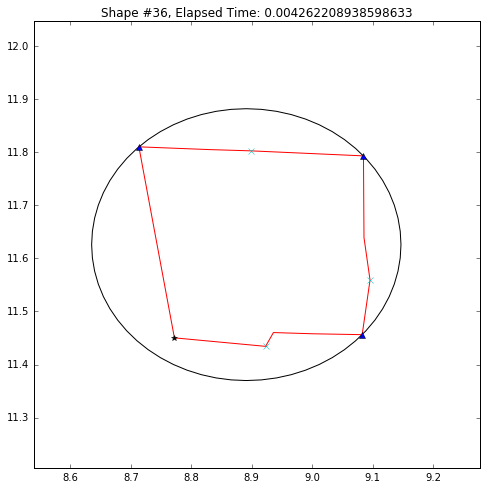

Point 0: True
Point 1: True
Point 2: True


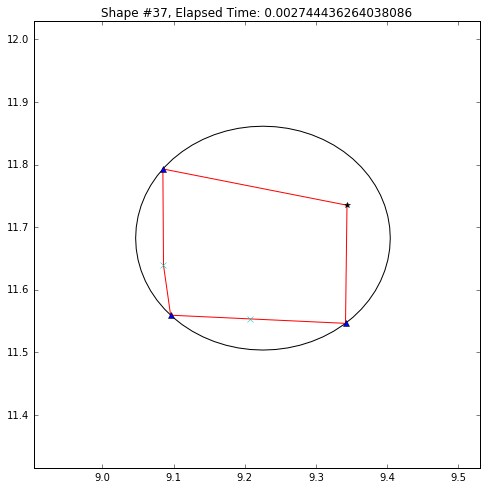

Point 0: True
Point 1: True


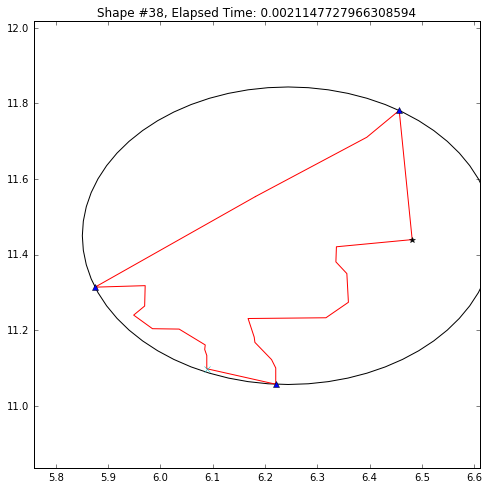

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True


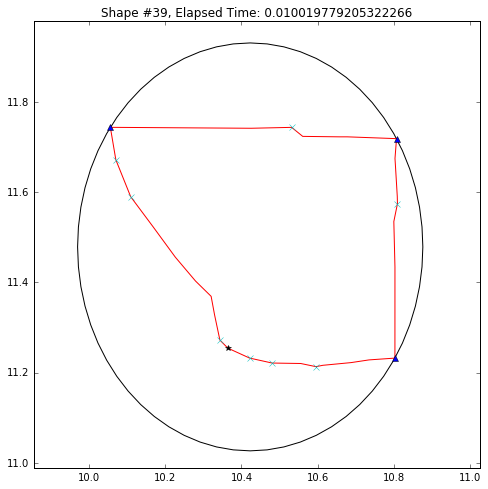

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True
Point 9: True
Point 10: True


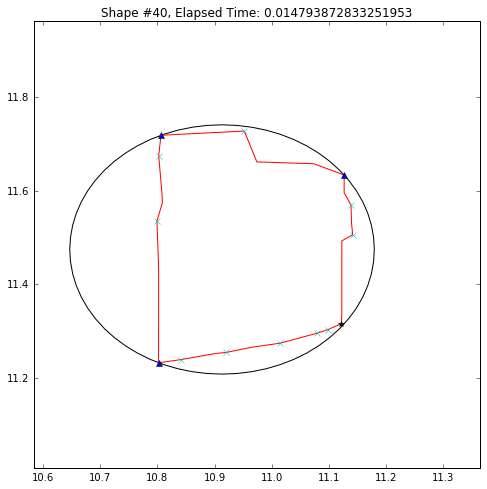

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True


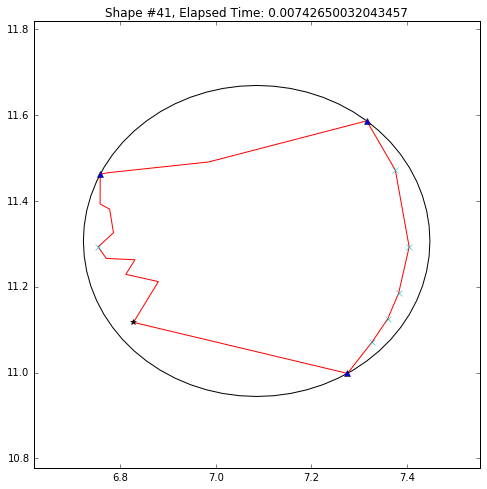

Point 0: True
Point 1: True


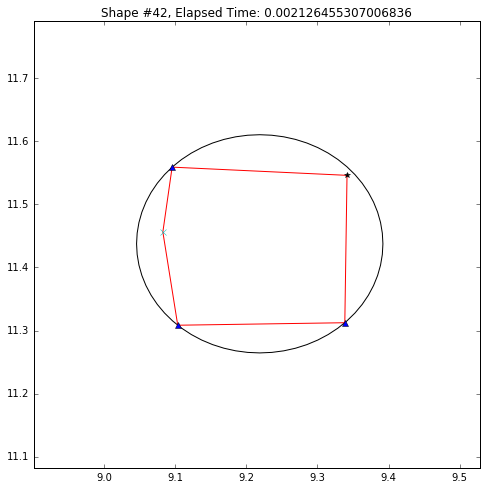

Point 0: True
Point 1: True
Point 2: True
Point 3: True


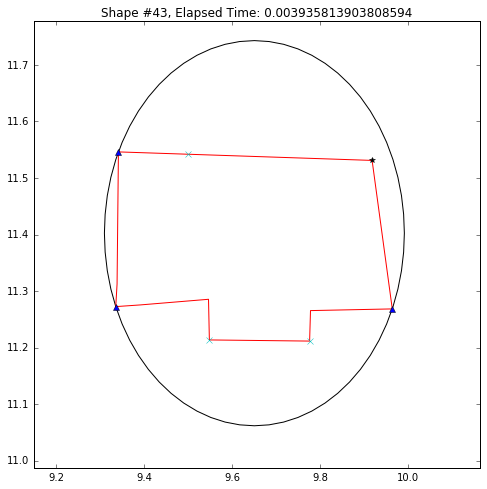

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True


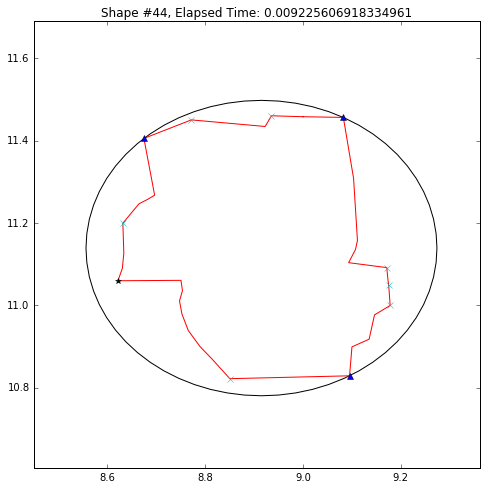

Point 0: False
Point 1: True
Point 2: True
Point 3: True
Point 4: False


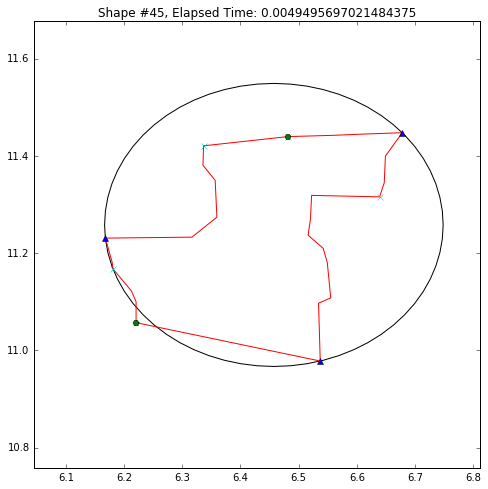

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True


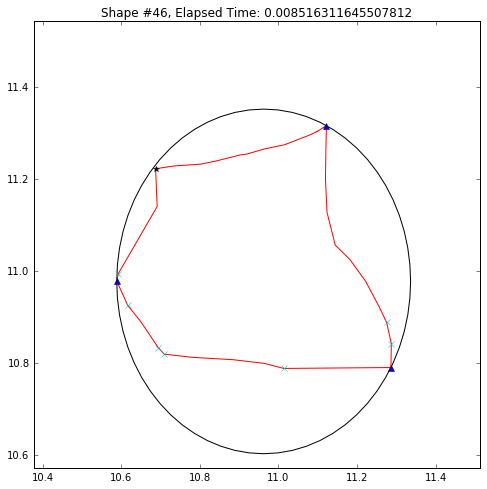

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True
Point 5: True
Point 6: True
Point 7: True
Point 8: True


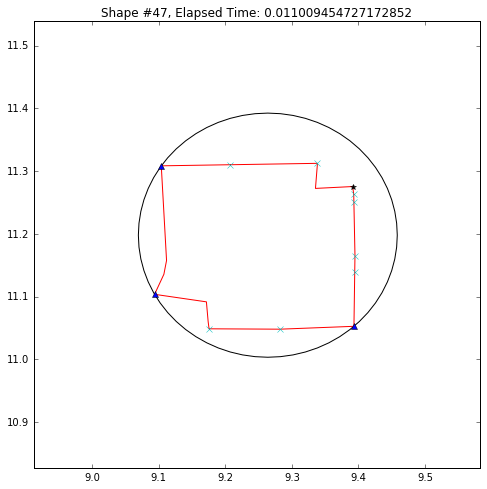

Point 0: True
Point 1: True
Point 2: True
Point 3: True
Point 4: True


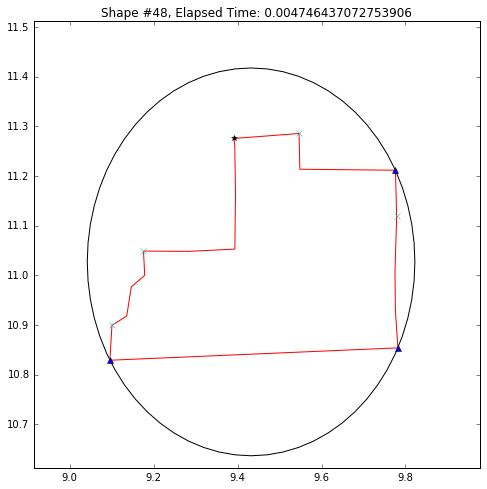

In [62]:
demo_mbc(chains)

In [59]:
cent.hull(chains[45])

array([[  6.2204628 ,  11.05700016],
       [  6.53712082,  10.9780302 ],
       [  6.63916111,  11.3157196 ],
       [  6.67817688,  11.44760036],
       [  6.48136616,  11.43962955],
       [  6.33650017,  11.42066002],
       [  6.16758585,  11.23085022],
       [  6.18061113,  11.16771984]])

In [27]:
import numpy as np

In [28]:
np.trunc?


In [29]:
np.ceil?

In [35]:
import math

In [38]:
round?